In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

csv_finenames = [
    "",
    "",
    "",
    "",
]

folder_path = "/Users/"
rwd_data = os.path.join(folder_path, rwd)

,timestamp,DeltaF/F-1,Zscore-1
0,-1799992.250,-0.889,-1.039
1,-1799959.000,-0.645,-0.610
2,-1799925.625,-0.741,-0.779
3,-1799892.375,-0.641,-0.604
4,-1799859.000,-0.403,-0.185


In [6]:
all_data = []
time_axis = None

for csv_filename in csv_finenames:
    file_path = os.path.join(folder_path, csv_filename)
    df = pd.read_csv(file_path)
    
    time_from_start = (df["timestamp"] - df["timestamp"].iloc[0]) / 60000
    df["Time(min)"] = time_from_start - 30
    
    all_data.append(df["Zscore-1"])
    
    if time_axis is None:
        time_axis = df["Time(min)"]

print(f"Loaded {len(all_data)} files.")

Loaded 4 files.


In [ ]:
try:
    data_array = np.array([data.values for data in all_data]).T

    mean_trace = np.mean(data_array, axis=1)
    
    # SEMを計算
    std_trace = np.std(data_array, axis=1, ddof=1)
    n_samples = data_array.shape[1]
    sem_trace = std_trace / np.sqrt(n_samples)

except ValueError as e:
    print(f"--- エラー ---")
    print(f"エラー内容: {e}")
    raise

データ形状 (タイムポイント数, 個体数): (162070, 4)
平均とSEMの計算が完了しました。


全データポイント数: 162070 点を描画します。


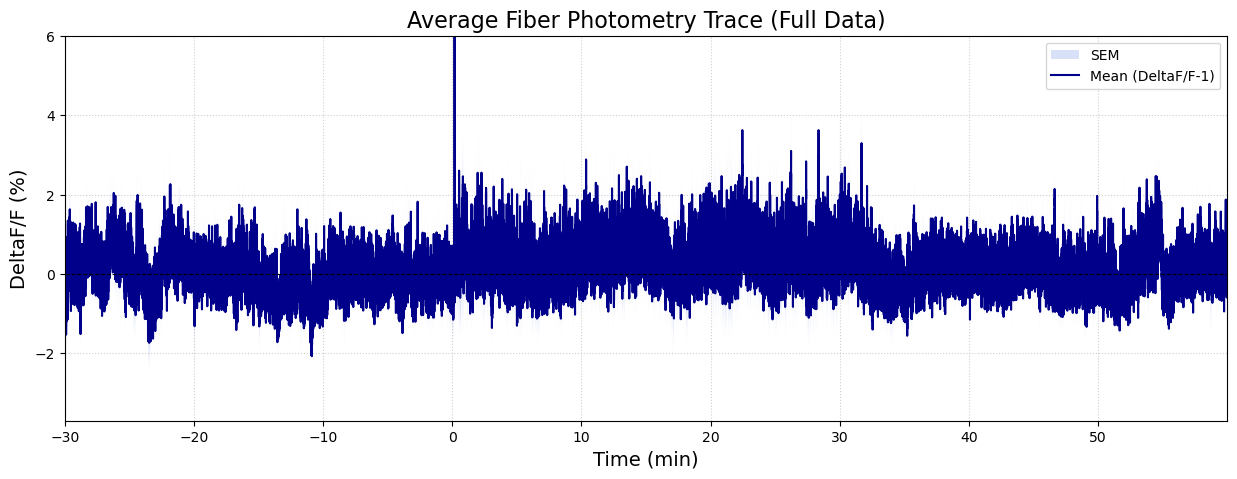

In [ ]:
plt.figure(figsize=(15, 5)) 

plt.fill_between(
    time_axis.values,
    mean_trace - sem_trace,
    mean_trace + sem_trace,
    color='royalblue',
    alpha=0.2,
    label='SEM',
    linewidth=0   
)

plt.plot(
    time_axis.values,
    mean_trace,
    color='darkblue',
    linewidth=1.5,
    label='Mean (DeltaF/F-1)' 
)

plt.xlabel('Time (min)', fontsize=14)
plt.ylabel('DeltaF/F (%)', fontsize=14) 
plt.title('Average Fiber Photometry Trace (Full Data)', fontsize=16)
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.xlim(time_axis.min(), time_axis.max())
plt.ylim(top=6)

plt.show()